# Create a dataset of ecg

In Notebook 1 we explain how to create a [dataset](https://github.com/analysiscenter/dataset/) of ecgs and give very basic examples how to use dataset. 

## Index ecg

Working with ecg begins with ```FilesIndex```. ```FilesIndex``` contains index and location of each ecg we want to process. 

Let all ecgs are stored in [wfdb format](https://www.physionet.org/physiotools/wpg/wpg_35.htm) in folder with path '.../data/ECG'. Let's create a new ```FilesIndex``` with all ecgs from this folder.

In [1]:
import sys
import os

sys.path.append(os.path.join("..", "..", ".."))

import ecg.dataset as ds
index = ds.FilesIndex(path=".../data/ECG/*.hea", no_ext=True, sort=True)

Now each ecg is indexed with its filename. Indices are stored in ```index.indices```:

In [2]:
print(index.indices)

['A00001' 'A00002' 'A00003' ..., 'A08526' 'A08527' 'A08528']


## Init dataset

We need a dataset to generate batches of ecgs, define and pipelines and models. Dataset can be constructed from ```FilesIndex``` and action class that process batсhes of data. Action class for ecg is [```EcgBatch```](https://github.com/analysiscenter/ecg/blob/unify_models/doc/batch.md). So we create a dataset for ecg as follows:

In [3]:
from ecg.batch import EcgBatch
eds = ds.Dataset(index, batch_class=EcgBatch)

Using TensorFlow backend.


## Start using dataset

Let's generate a first batch of size 1000:

In [4]:
batch = eds.next_batch(1000)

Up to now ```batch``` does not contain any data, only indices and paths to ecgs. 

## Apply action

Any preprocess begins with loading of data. Therefore, the first example is action ```load```. Note that paths to ecgs are already in batch, so simply inticate data format and component we want to load:

In [5]:
batch_with_data = batch.load(fmt="wfdb", components=["signal", "meta"])

Now ```batch_with_data``` contatains 100 loaded signals. Any ecg can be accessed by its index, e.g. ```batch['A00010']```.
Let's plot a signal from ecg with index```'A00010'```:

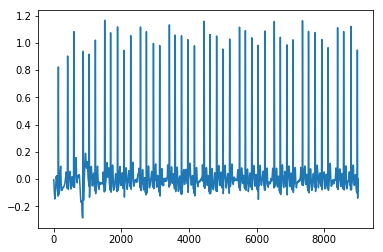

In [6]:
import matplotlib.pyplot as plt
plt.plot(batch_with_data['A00282'].signal.ravel())
plt.show()

Any other action can be applied to ```batch_with_data``` in the same way, e.g. action ```flip_signals``` that flips signals whose R-peaks are directed downwards. Nore that ```flip_signals``` modifies batch inplace.

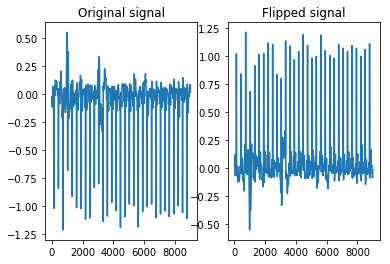

In [7]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.set_title('Original signal')
plt.plot(batch_with_data['A00112'].signal.ravel())

ax = fig.add_subplot(122)
ax.set_title('Flipped signal')
plt.plot(batch_with_data.flip_signals()['A00112'].signal.ravel())
plt.show()

In next [Notebook 2](https://github.com/analysiscenter/ecg/blob/unify_models/doc/ecg_tutorial_part_2.ipynb) we will combine actions in pipeline.